In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from func import *
import jieba
import re
import os
# re -> \d for number, \s for any space (\t\r\n...)

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from PIL import Image

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools as it

import jieba
import re
import numpy as np
from PIL import Image
from func import *

#### 讀取資料夾中的資料

In [4]:
path = 'C:/Users/User/Desktop/python playground/week5/first.txt'
title, data = readdir(path, 0.6)


Number of files : 1


#### 顯示部份資料內容

In [5]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:50], '...', data[i][-50:-1], sep='\n', end='\n\n')

----Document : first----
1.鴻夏戀 郭台銘沒學的「大阪談判術」
鴻夏戀談了四年，過程相當曲折。畢竟異國戀情會牽涉到不同的文
...
日圓，稍早最高升至174日圓、創2015年11月24日以來新高水準；夏普4日收盤狂飆16.8%。



#### 新增詞彙至自定義詞庫，並匯入該詞庫

In [6]:
savetofile('./dict1.txt', [['轉虧為盈']])
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.786 seconds.
Prefix dict has been built succesfully.


#### 顯示部分資料內容

In [7]:
stopword= ['一','二','三','四','五','六','用','淨','利','值','前','據','談','自','至','曾','出','合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可','他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於','較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終','把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的','並','更','就','註','有','事','來','不','從','堺','權','從','卻','說','要','今','度','手','才','又','其','長','了','百','億','元','例如','可能','由於','因此',
             '土城','一份','上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分','事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元','企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二','雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用','本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果','不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','',
       '日本','之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中','因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性','假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元','金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大','資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為','預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家',
       '維持','公開','整體','表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期','評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海','夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012','10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都','郭董','能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入','出現',
          '一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底','完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下','已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出','社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高','市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK','12','7000','3500','2015','2016','25','30','000','29']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;○<=>@[]^_{}|~\\\""

#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [8]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Number of word in document (first) :  2601
[('\r\n', 488), (' ', 162), ('技術', 52), ('產業', 37), ('革新', 33), ('銀行', 29), ('收購', 27), ('台灣', 25), ('合作', 25), ('液晶', 21)]


#### 顯示各文件低於閥值 (limit) 的字詞

In [9]:
limit = 50
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : first----
沒學, 談判術, 過程, 相當, 曲折, 畢竟, 異國戀, 情會, 牽涉, 文化, 難度, 本來, 未來, 修成, 正果, 全世界, 編按, 四日, 決議, 傾向, 支持, 收購案, 隨後, 否認, 當天, 深夜, 急飛, 並訂, 普高, 層會, 談後舉行, 簽署, 優先, 談判, 協議, 並預計, 收購, 不料, 這些, 說法, 不久, 遭, 強調, 僅為, 有效期限, 延至, 舉止, 並不, 符合, 日式, 


#### 利用 wordDictionary 移除只出現一次的字詞，並顯示部份結果

In [10]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : first
1 . 鴻   銘  的 「 大阪  」 
 鴻 談 了 四年 ，    。     到 不同 的...日圓 ， 早 最高  1 日圓 、  2015 年  月   來   ； 夏普 4  狂  。 



#### 移除所有標點符號、非中文英文數字之資料

In [11]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [12]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : first
  鴻   銘  的  大阪    鴻  ...   月   來    夏普   狂  



#### 初始化 TFIDF 物件

In [13]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.3, analyzer = 'word', stop_words = stopword)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙

In [14]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '大阪', '成本', '例如', '合理性', '而', '能', '達', '仍', '財務', '較', '支出', '民國', '來', '提案', '客戶超過', '月底', '文件', '已', '10', '稅後淨利', '2016', '提供', '然而', '不過', '確性', '認列', '的', '總資產', '後', '另', '及與', '立刻', '談', '兩家', '分攤', '最高', 'Display', '能力', '代工', '中', '二月', '附註', '一副', '人', '今天', '供', '不同', '目前', '所', '三星', '能力利益', '旗下', '據', '又', '媒體', '相關', '沒有', '會計', '如下', '4', '事業', '也', '權', '其中', '其', '至', '不', '代廠', '地區', '四', '如果', '可以', '表示', '自', '營業外', '由', '之', '判斷', '安倍', '鴻海', '進行', '這份', '日元', '假設', '年本', 'NT', '模型', '比', '尺寸', '不會', '就', '測試', '大', '群創', '工廠', '一樣', '執行', '高橋', '億日圓', '赴', '入座', '看', '郭台銘', '董事', '高達', '結轉', '計算資金', '各位', '向', '五', 'JDI', '廠', '影響財務', '幅度', '總額', '我', '堺', '再', 'WitsView', '外界', '因此', '要', '家', '本年', '雙方', '他', '報告增加', '權益', '億', '30', '佔', '利', '同期', '傳出', '3500', '主要', '企業', '顯示', '日', '認為', '評估', '受到', '25', '都', '但', '可能', '召開', '業務', '附', '將', '到', '進', '其他', '五日', '以及', '報告', '資金評估', '總部', '做', '之間', '個', '供應商', '三', '擁有', '估計', '已經', '月', '合

#### 計算 TFIDF 詞頻矩陣

In [15]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

#### 顯示詞頻矩陣大小

In [16]:
tfidf_matrix.shape

(1, 76)

#### 顯示部份詞頻矩陣中的字詞

In [17]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一則', '七百', '三者', '三週', '上察覺', '下之意', '不太', '不進', '主義', '事營', '事部', '二次', '五百', '以交', '來源', '供商', '具優', '出貨', '到限制', '半數', '原踏步', '可攜', '合理', '啟鴻', '圍鮮', '在必得', '多工', '多時', '大主幹', '官洽', '將月', '將用', '巨現', '已續', '市率', '年同', '幾大', '後五至', '後有', '得償', '思維', '意向', '技術', '搗龍', '搞不', '放年', '政院', '敵不', '日召', '日將']


In [18]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    for j in range(len(words)):
        if tfidf_matrix[i,j] > 0.2:
              print(words[j], tfidf_matrix[i,j])

----Document : first----
技術 0.9690979236849104


In [19]:
dist = cosine_similarity(tfidf_matrix)
print(dist)

[[1.]]


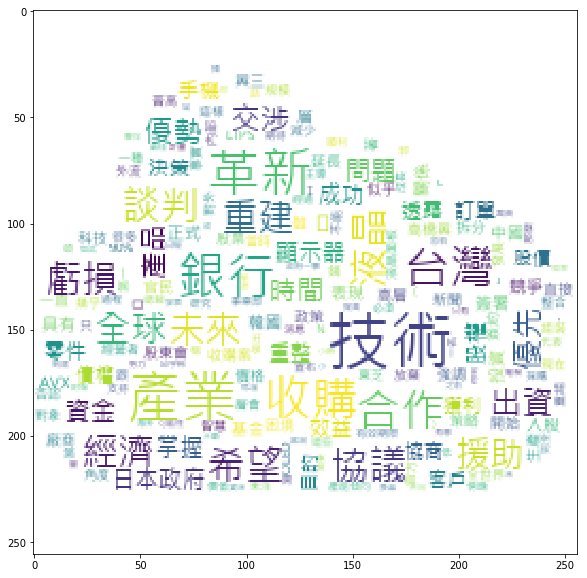

In [20]:
font = r"C:\Windows\Fonts\Microsoft JhengHei UI\msjh.ttc"
alice_mask = np.array(Image.open("week4/cloudy.png"))
wordcloud = WordCloud(font_path=font,background_color="white", mask=alice_mask)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.savefig("week5/first.png")